**Calculate the percentage of incorrectly attributed reads in the following file for sample 1 and sample2**

* reads_sample1_supporting_sample2 vs all reads of sample1
* reads_sample2_supporting_sample1 vs all reads of sample2

**The percentage of incorectly attributed read is then ploted with matplotlib according to the amount of reads found**

In [1]:
with open('./jeter.tsv', 'r') as file:
    for i in range (10):
        print (next(file))

#Machine:FlowCell:Run:Lane-1	sample1	Machine:FlowCell:Run:Lane-2	sample2	same.lane	reads_sample1_supporting_sample1	reads_sample1_supporting_sample2	reads_sample1_supporting_others	reads_sample2_supporting_sample2	reads_sample2_supporting_sample1	reads_sample2_supporting_other

HWI-1KL149:C1CU7ACXX:20:5	CD06862	HWI-1KL149:D2513ACXX:56:3	CD07477	0	499	2	1	1237	4	3

HWI-1KL149:C1CU7ACXX:20:7	CD06532	HWI-1KL149:C1CU7ACXX:20:6	CD07618	0	512	2	0	389	0	0

HWI-1KL149:D2513ACXX:56:1	CD06866	HWI-1KL149:C1CU7ACXX:20:7	CD08779	0	575	3	0	1587	6	1

HWI-1KL149:C1CU7ACXX:20:3	CD09003	HWI-1KL149:C1CU7ACXX:20:5	CD09094	0	51	0	0	53	0	0

HWI-1KL149:D2513ACXX:56:3	CD08704	HWI-1KL149:C0RNBACXX:18:3	CD09048	0	802	1	3	1501	6	2

HWI-1KL149:D2513ACXX:56:1	CD07559	HWI-1KL149:D2513ACXX:56:3	CD08704	0	62	2	0	142	0	3

M00491:000000000-A46H3:25:1	CD04635	HWI-1KL149:C1CU7ACXX:20:6	CD06724	0	3376	21	3	2104	6	4

HWI-1KL149:D2513ACXX:56:1	CD06506	HWI-1KL149:C1CU7ACXX:20:3	CD08973	0	121	0	0	13	0	0

HWI-1KL149:D2513ACXX:

**Import packages**

In [3]:
%pylab inline
import csv
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


**Create lists to store results for different thresholds from 0 to 25%**

In [4]:
res_s1_sup_s2 = [0 for i in range (26)]
res_s2_sup_s1 = [0 for i in range (26)]
res_s1_sup_other = [0 for i in range (26)]
res_s2_sup_other = [0 for i in range (26)]

**parse file and populate the list**

In [5]:
with open('./jeter.tsv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    # remove header
    next(reader)
    # iterate over rows
    for R in reader:
        s1_sup_s2 = float(R[6])*100/(float(R[5])+float(R[6])+float(R[7]))
        s2_sup_s1 = float(R[9])*100/(float(R[8])+float(R[9])+float(R[10]))
        s1_sup_other = float(R[7])*100/(float(R[5])+float(R[6])+float(R[7]))
        s2_sup_other = float(R[10])*100/(float(R[8])+float(R[9])+float(R[10]))
        for seuil in range (26):
            if s1_sup_s2 >= seuil:
                res_s1_sup_s2[seuil]+=1
            if s2_sup_s1 >= seuil:
                res_s2_sup_s1[seuil]+=1
            if s1_sup_other >= seuil:
                res_s1_sup_other[seuil]+=1
            if s2_sup_other >= seuil:
                res_s2_sup_other[seuil]+=1

In [6]:
print (res_s1_sup_s2)
print (res_s2_sup_s1)
print (res_s1_sup_other)
print (res_s2_sup_other)

[77869, 10635, 5372, 3612, 2686, 2088, 1643, 1325, 1029, 817, 644, 542, 458, 394, 330, 292, 263, 237, 223, 206, 196, 173, 156, 143, 127, 119]
[77869, 9992, 5429, 3699, 2675, 2018, 1530, 1205, 973, 806, 682, 587, 532, 453, 389, 355, 314, 260, 235, 189, 179, 162, 137, 120, 111, 99]
[77869, 2435, 278, 91, 37, 25, 17, 15, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3]
[77869, 2064, 227, 74, 43, 20, 16, 12, 9, 7, 7, 4, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


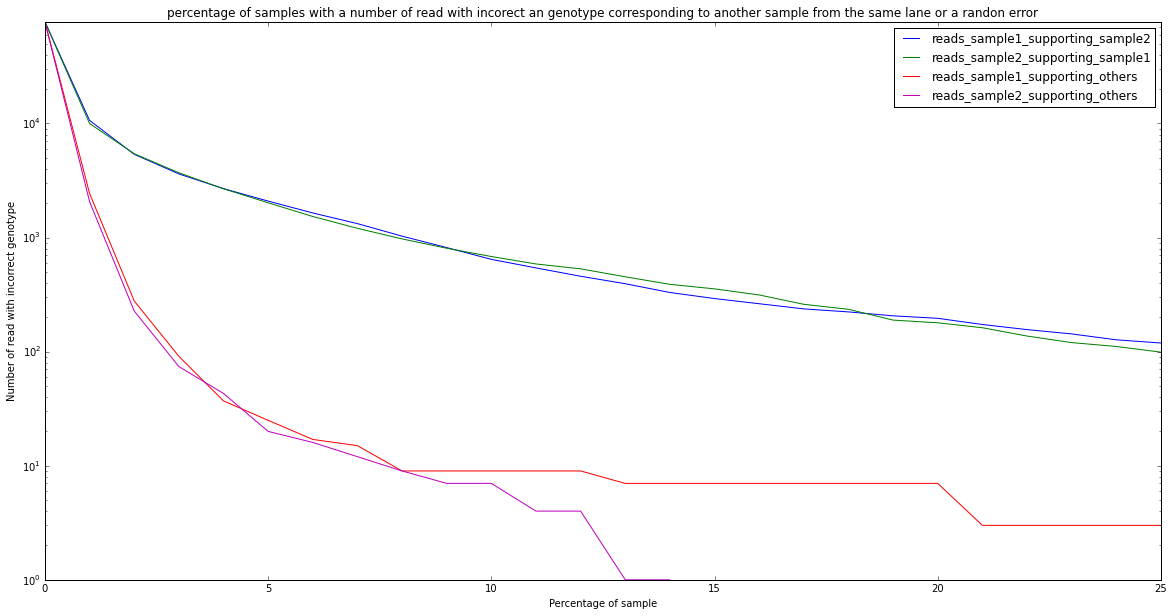

In [31]:
plt.figure(figsize=(20, 10))
plt.title("percentage of samples with a number of read with incorect an genotype corresponding to another sample from the same lane or a randon error")
plt.xlabel("Percentage of sample")
plt.ylabel("Number of read with incorrect genotype")
plt.ylim(1,77869)

line1 = plt.semilogy(res_s1_sup_s2, 'b', label = 'reads_sample1_supporting_sample2')
line2 = plt.semilogy(res_s2_sup_s1, 'g', label = 'reads_sample2_supporting_sample1')
line3 = plt.semilogy(res_s1_sup_other, 'r', label = 'reads_sample1_supporting_others')
line4 = plt.semilogy(res_s2_sup_other, 'm', label = 'reads_sample2_supporting_others')

plt.legend(loc='best')
